In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('worldcities.csv')

#data overview
print(data.head())
print(data.info())

        city city_ascii      lat       lng    country iso2 iso3   admin_name  \
0      Tokyo      Tokyo  35.6870  139.7495      Japan   JP  JPN        Tōkyō   
1    Jakarta    Jakarta  -6.1750  106.8275  Indonesia   ID  IDN      Jakarta   
2      Delhi      Delhi  28.6100   77.2300      India   IN  IND        Delhi   
3  Guangzhou  Guangzhou  23.1300  113.2600      China   CN  CHN    Guangdong   
4     Mumbai     Mumbai  19.0761   72.8775      India   IN  IND  Mahārāshtra   

   capital  population          id  
0  primary  37785000.0  1392685764  
1  primary  33756000.0  1360771077  
2    admin  32226000.0  1356872604  
3    admin  26940000.0  1156237133  
4    admin  24973000.0  1356226629  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48059 entries, 0 to 48058
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        48059 non-null  object 
 1   city_ascii  48057 non-null  object 
 2   lat         48059 n

In [5]:
# . Basic Descriptive Statistics (Analysis: Population Summary)
population_stats = data['population'].describe()
print("Population Statistics:\n", population_stats)

Population Statistics:
 count    4.780800e+04
mean     1.078566e+05
std      6.855111e+05
min      0.000000e+00
25%      1.219100e+04
50%      2.091350e+04
75%      4.680850e+04
max      3.778500e+07
Name: population, dtype: float64


In [6]:
#analysis of top 10 most populous cities
top_10_cities = data[['city','country','population']].sort_values(by='population', ascending=False).head(10)
print("Top 10 Most Populous Cities:\n", top_10_cities)

Top 10 Most Populous Cities:
           city       country  population
0        Tokyo         Japan  37785000.0
1      Jakarta     Indonesia  33756000.0
2        Delhi         India  32226000.0
3    Guangzhou         China  26940000.0
4       Mumbai         India  24973000.0
5       Manila   Philippines  24922000.0
6     Shanghai         China  24073000.0
7    São Paulo        Brazil  23086000.0
8        Seoul  Korea, South  23016000.0
9  Mexico City        Mexico  21804000.0


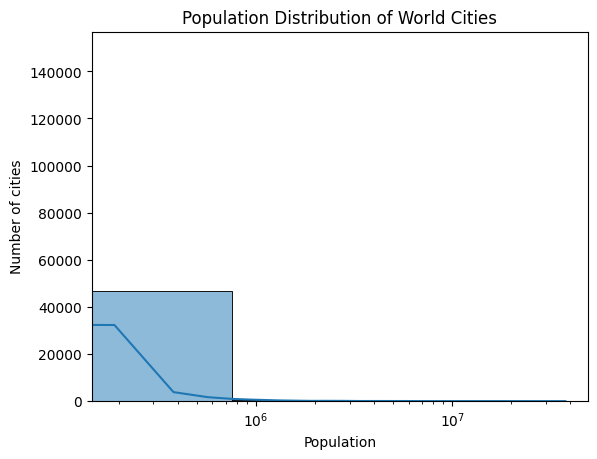

In [7]:
# 5. Population Distribution Histogram (Visualization: Population Distribution)
plt.Figure(figsize=(10,6))
sns.histplot(data['population'],bins=50,kde=True)
plt.title('Population Distribution of World Cities')
plt.xlabel('Population')
plt.ylabel('Number of cities')
plt.xscale('log')
plt.show()

In [8]:
# 6. Number of Capital Cities vs Non-Capital Cities (Analysis: Capital Status Counts)
capital_counts = data['capital'].value_counts()
print("Capital vs Non-Capital Cities:\n", capital_counts)


Capital vs Non-Capital Cities:
 capital
minor      11248
admin       3639
primary      251
Name: count, dtype: int64


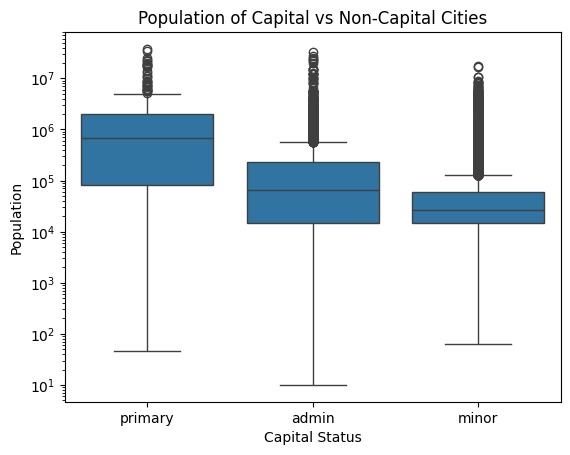

In [9]:
# 7. Population of Capitals vs Non-Capitals (Visualization: Population by Capital Status)
plt.Figure(figsize=(8,6))
sns.boxplot(x='capital', y='population', data=data)
plt.yscale('log')
plt.title('Population of Capital vs Non-Capital Cities')
plt.xlabel('Capital Status')
plt.ylabel('Population')
plt.show()


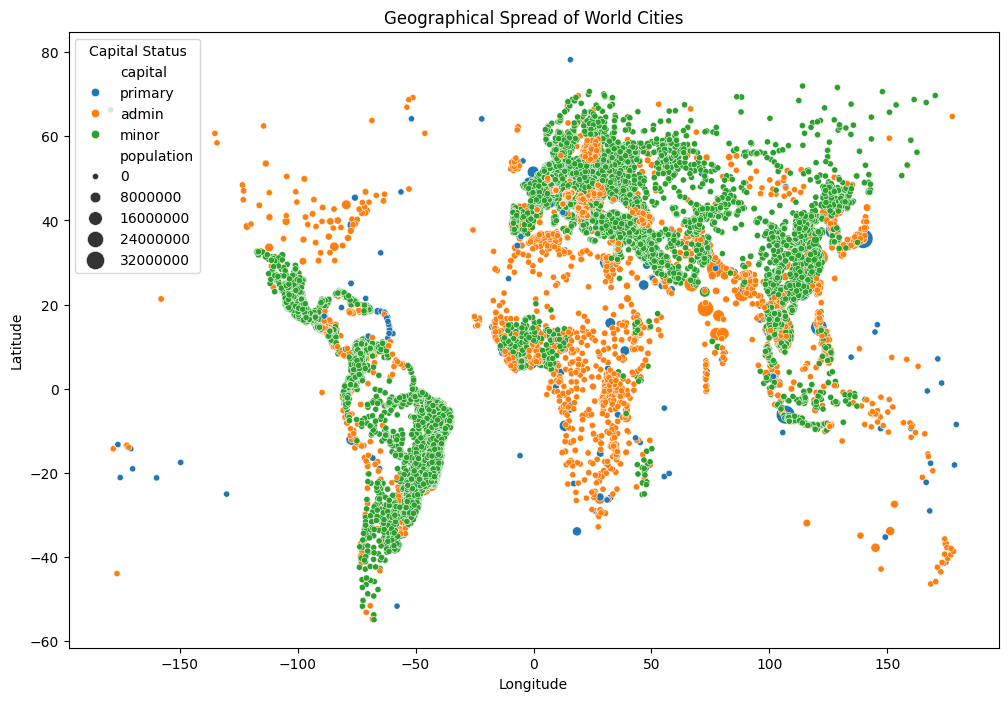

In [10]:
# 8. Geographical Spread of Cities (Visualization: Scatter Plot of Cities by Lat and Long)
plt.figure(figsize=(12,8))
sns.scatterplot(x="lng",y ="lat",data=data,hue="capital",size="population",legend ="brief",sizes=(20,200))
plt.title('Geographical Spread of World Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Capital Status')
plt.show()


In [11]:
# 9. Rank Cities for Smart City Potential (Analysis: Scoring by population and capital)
data['capital_flag'] = data['capital'].apply(lambda x: 1 if x == "primary" else 0)
data['smart_city_score'] = data["population"].rank(ascending=False) + data['capital_flag'] * 1000
ranked_cities = data.sort_values(by="smart_city_score",ascending=False)[['city','country','population','capital','smart_city_score']].head(10)
print("Top 10 Cities for Smart City Potential:\n", ranked_cities)



Top 10 Cities for Smart City Potential:
                city                                        country  \
47750     Adamstown                               Pitcairn Islands   
47679     Ngerulmud                                          Palau   
47654   Basse-Terre                                     Guadeloupe   
47647      Kingston                                 Norfolk Island   
47633        Brades                                     Montserrat   
47561         Alofi                                           Niue   
47522     Jamestown  Saint Helena, Ascension, and Tristan da Cunha   
47508         Yaren                                          Nauru   
47502  Vatican City                                   Vatican City   
47491      Hamilton                                        Bermuda   

       population  capital  smart_city_score  
47750        47.0  primary           48751.0  
47679       271.0  primary           48679.5  
47654       307.0  primary           48655.0  


In [12]:
#average population by country
avg_pop_country = data.groupby('country')['population'].mean().sort_values(ascending=False).head(20)
print("Top 20 countries population averege: \n", avg_pop_country)

Top 20 countries population averege: 
 country
Singapore               5.983000e+06
China                   7.939591e+05
Kuwait                  7.343922e+05
United Arab Emirates    6.434473e+05
Korea, South            5.974348e+05
Macau                   5.687000e+05
Nigeria                 5.591923e+05
Hong Kong               5.327502e+05
Sudan                   4.353858e+05
Bangladesh              3.878777e+05
Saudi Arabia            3.706994e+05
Indonesia               3.550121e+05
Malaysia                3.418106e+05
Korea, North            3.172870e+05
Egypt                   3.088498e+05
Vietnam                 3.031802e+05
Pakistan                2.949948e+05
Congo (Kinshasa)        2.920621e+05
Qatar                   2.665054e+05
Martinique              2.539950e+05
Name: population, dtype: float64


In [13]:
# 11. Capitals Population Comparison (Analysis: Capitals population by Country)
capital_pop = data[data['capital']=='primary'].groupby('country')['population'].sum().sort_values(ascending=False).head(10)
print("Top 10 Countries by Capitals Population:\n", capital_pop)

Top 10 Countries by Capitals Population:
 country
Japan           37785000.0
Indonesia       33756000.0
Philippines     24922000.0
Korea, South    23016000.0
Mexico          21804000.0
Egypt           20296000.0
Bangladesh      19134000.0
China           18522000.0
Thailand        18007000.0
Russia          17332000.0
Name: population, dtype: float64


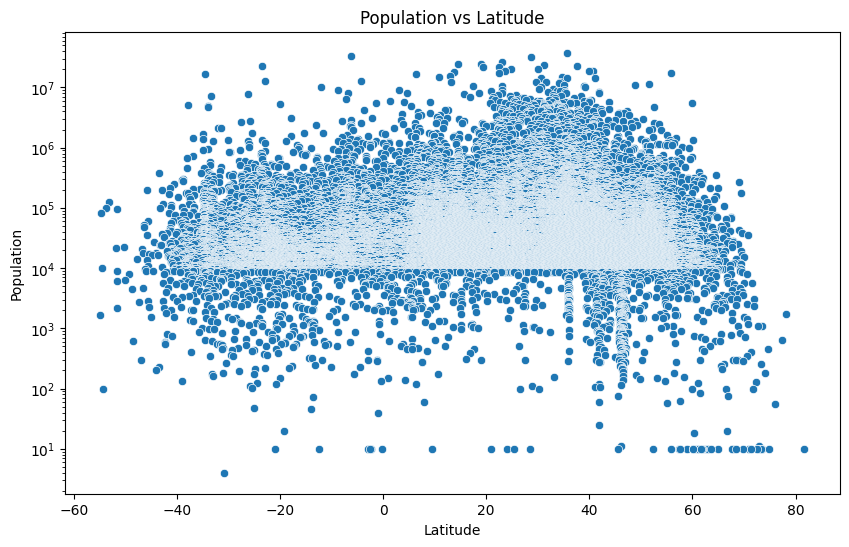

In [14]:
# 12. Population vs Latitude (Analysis: Correlation Geographic)
plt.figure(figsize=(10,6))
sns.scatterplot(x="lat",y='population',data=data)
plt.title('Population vs Latitude') 
plt.xlabel('Latitude')
plt.ylabel('Population')
plt.yscale('log')
plt.show()

In [15]:
# 13. Correlation Matrix (Analysis: Numeric Correlations)
numeric_corr = ['lat','lng',"population",'capital_flag','smart_city_score']
corr = data[numeric_corr].corr()
print("Correlation Matrix:\n", corr)

Correlation Matrix:
                        lat       lng  population  capital_flag  \
lat               1.000000  0.012679   -0.005433     -0.027219   
lng               0.012679  1.000000    0.070939     -0.002900   
population       -0.005433  0.070939    1.000000      0.248640   
capital_flag     -0.027219 -0.002900    0.248640      1.000000   
smart_city_score  0.057452 -0.069335   -0.218198     -0.072118   

                  smart_city_score  
lat                       0.057452  
lng                      -0.069335  
population               -0.218198  
capital_flag             -0.072118  
smart_city_score          1.000000  


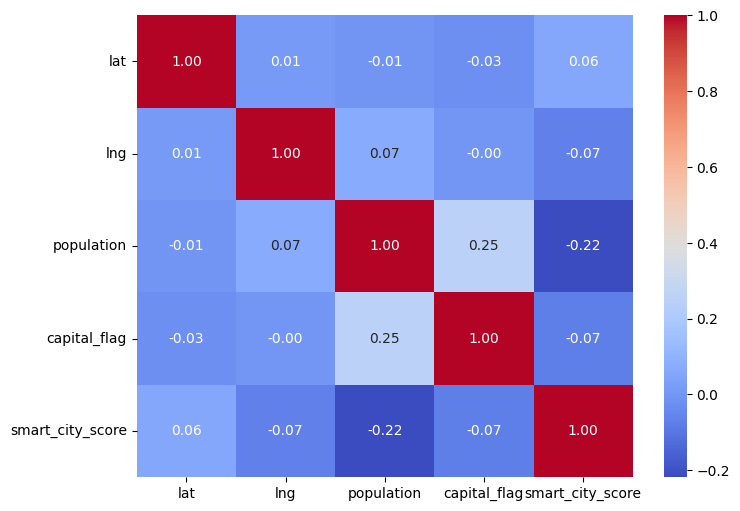

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot =True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
# 14. Group Cities by Regions (Example: Admin Name analysis)
top_regions = data['admin_name'].value_counts().head(10)
print("Top 10 Regions by Number of Cities:\n", top_regions)

Top 10 Regions by Number of Cities:
 admin_name
Bihār             1405
Andhra Pradesh    1064
Tamil Nādu        1061
Kerala             650
California         522
Karnātaka          491
Madhya Pradesh     429
Minas Gerais       392
São Paulo          389
New York           373
Name: count, dtype: int64


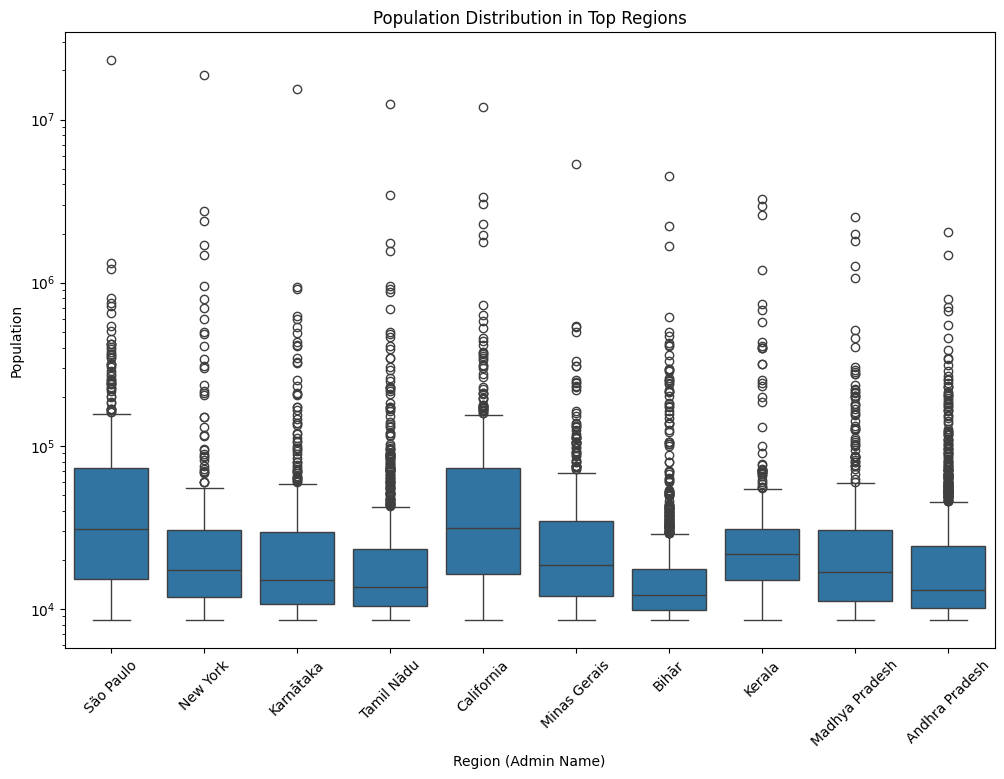

In [18]:
# 15. Population Boxplot for Top Regions (Visualization: Region wise population spread)
plt.figure(figsize=(12,8))
top_region_names = top_regions.index.tolist()
sns.boxplot(x='admin_name', y='population', data=data[data['admin_name'].isin(top_region_names)])
plt.yscale('log')
plt.title('Population Distribution in Top Regions')
plt.xlabel('Region (Admin Name)')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

In [19]:
# 16. Population Grouping (Analysis: Categorize cities by population size)
bins = [0, 100000, 1000000, 5000000, 10000000, np.inf]
data['population_group'] = pd.cut(data['population'], bins=bins, labels=['<100K', '100K-1M', '1M-5M', '5M-10M', '>10M'])
population_group_counts = data['population_group'].value_counts().sort_index()
print("Population Group Counts:\n", population_group_counts)

Population Group Counts:
 population_group
<100K      41689
100K-1M     5372
1M-5M        615
5M-10M        86
>10M          43
Name: count, dtype: int64


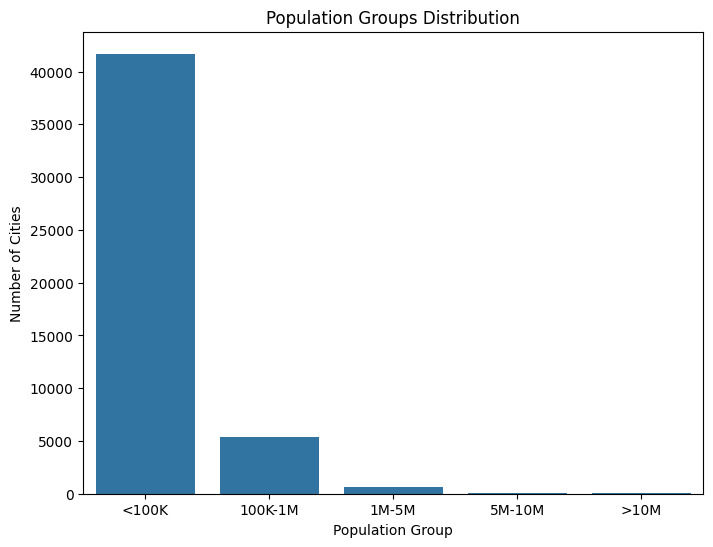

In [20]:
# 17. Population Group Visualization (Visualization: Population Groups distribution)
plt.figure(figsize=(8,6))
labels = ['<100K', '100K-1M', '1M-5M', '5M-10M', '>10M']
sns.countplot(x='population_group', data = data, order=labels)
plt.title('Population Groups Distribution')
plt.xlabel('Population Group')
plt.ylabel('Number of Cities')
plt.show()

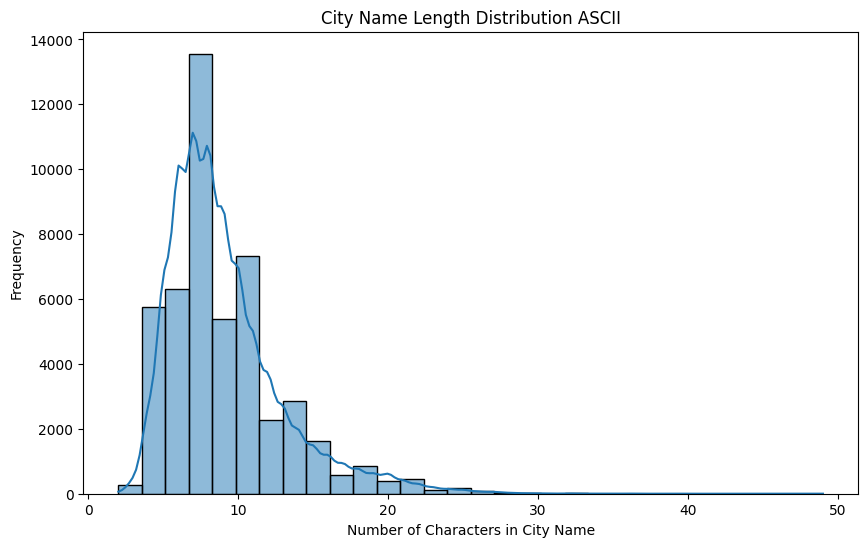

In [21]:
# 18. City Name ASCII Length Analysis (Analysis: City name character count)
data['city_name_length'] =data['city'].apply(lambda x: len(x))
plt.figure(figsize=(10,6))
sns.histplot(data['city_name_length'],bins=30,kde=True)
plt.title('City Name Length Distribution ASCII')
plt.xlabel('Number of Characters in City Name')
plt.ylabel('Frequency')
plt.show()

In [22]:
# 19. Average Population by Country ISO2 Code (Analysis: Population by Country Code)
avg_pop_country_iso2 = data.groupby('iso2')['population'].mean().sort_values(ascending=False).head(20)
print("Average Population by Country ISO2 Code:\n", avg_pop_country_iso2)

Average Population by Country ISO2 Code:
 iso2
SG    5.983000e+06
CN    7.939591e+05
KW    7.343922e+05
AE    6.434473e+05
KR    5.974348e+05
MO    5.687000e+05
NG    5.591923e+05
HK    5.327502e+05
SD    4.353858e+05
BD    3.878777e+05
SA    3.706994e+05
ID    3.550121e+05
MY    3.418106e+05
KP    3.172870e+05
EG    3.088498e+05
VN    3.031802e+05
PK    2.949948e+05
CD    2.920621e+05
QA    2.665054e+05
MQ    2.539950e+05
Name: population, dtype: float64


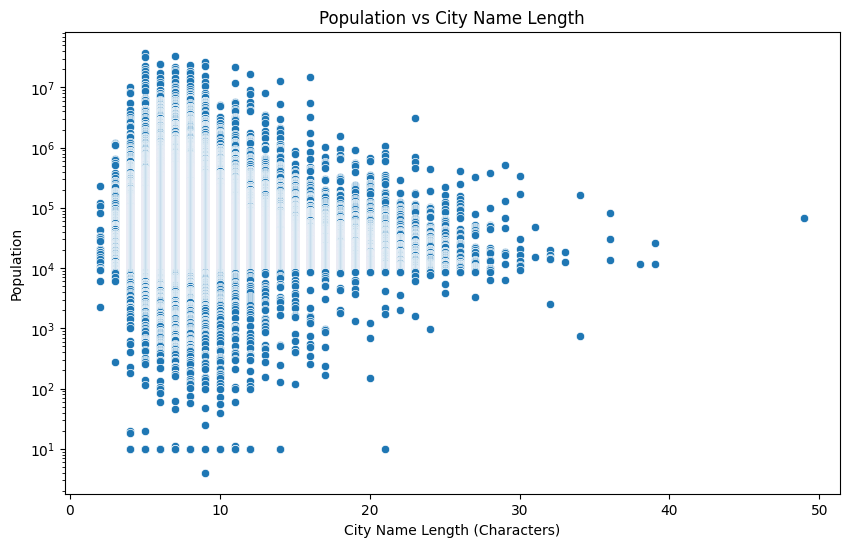

In [23]:
# 20. Scatter plot Population vs City Name Length (Analysis: Population vs Name Length)
plt.figure(figsize=(10,6))
sns.scatterplot(x='city_name_length', y='population', data=data)
plt.yscale('log')
plt.title('Population vs City Name Length')
plt.xlabel('City Name Length (Characters)')
plt.ylabel('Population')
plt.show()

In [24]:
# 21. Capital Status Counts by Country (Analysis: Capitals vs Non-Capitals in each country)
capital_status_count = data.groupby(['country','capital']).size().unstack(fill_value=0)
print("Capital Status Counts by Country:\n", capital_status_count)

Capital Status Counts by Country:
 capital                  admin  minor  primary
country                                       
Afghanistan                 33     18        1
Albania                     11      0        1
Algeria                     57      0        1
American Samoa               0      0        1
Andorra                      6      0        1
...                        ...    ...      ...
Virgin Islands, British      0      0        1
Wallis and Futuna            1      0        1
Yemen                       20     20        1
Zambia                       9      0        1
Zimbabwe                     9      0        1

[239 rows x 3 columns]


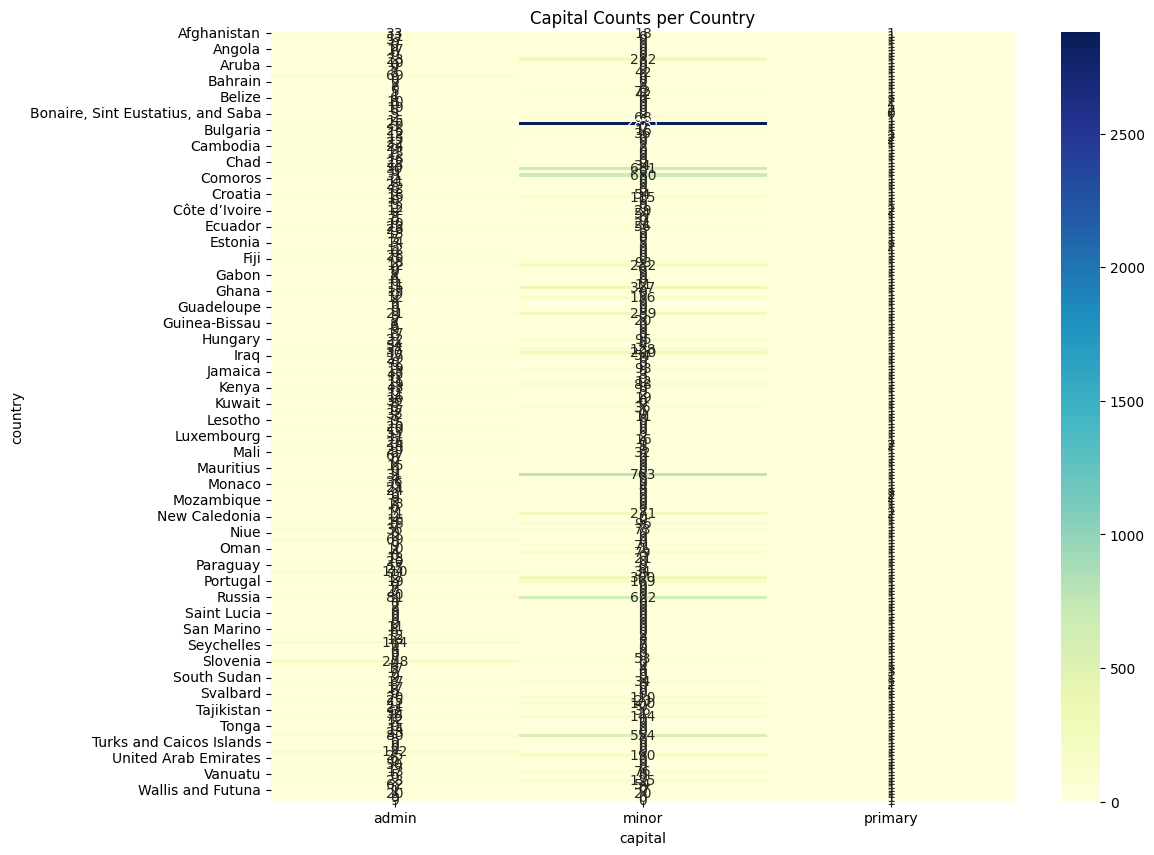

In [25]:
# 22. Heatmap of Capital Counts per Country (Visualization: Capitals per Country)
plt.figure(figsize=(12,10))
sns.heatmap(capital_status_count, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Capital Counts per Country')
plt.show()

In [26]:
# 23. Population Density Approximation (Analysis: Population per area proxy by admin regions)
# Note: Since no direct area, number of cities in admin units used as proxy
admin_city_counts = data['admin_name'].value_counts()
admin_population = data.groupby('admin_name')['population'].sum()
pop_density_proxy = admin_population / admin_city_counts
print("Population Density Proxy by Admin Region:\n", pop_density_proxy.sort_values(ascending=False).head(10))

Population Density Proxy by Admin Region:
 admin_name
Seoul                               2.301600e+07
Jakarta                             1.689756e+07
London, City of                     1.126200e+07
Ciudad de México                    1.090650e+07
Telangāna                           1.049400e+07
Kuala Lumpur                        8.911000e+06
Moskva                              8.734982e+06
Buenos Aires, Ciudad Autónoma de    8.394350e+06
Al Qāhirah                          6.982916e+06
Ādīs Ābeba                          5.704000e+06
dtype: float64


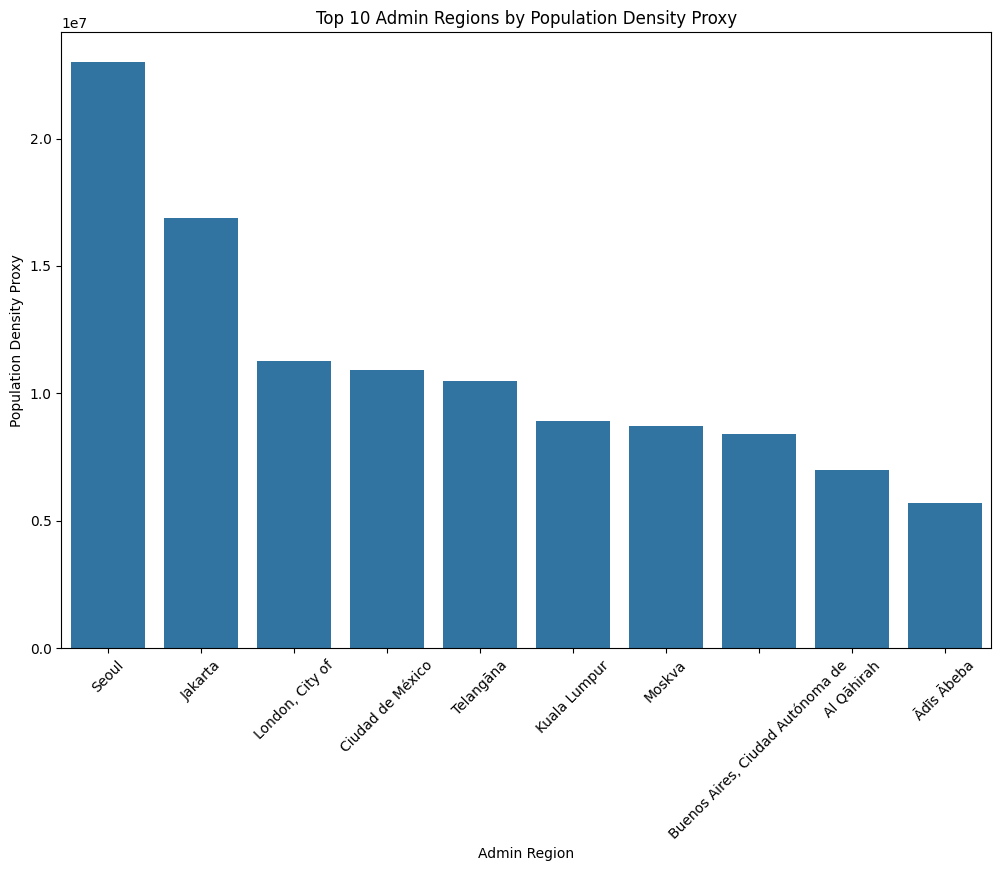

In [27]:
# 24. Visualization of Admin Population Density Proxy
plt.figure(figsize=(12,8))
top_density_regions = pop_density_proxy.sort_values(ascending=False).head(10)
sns.barplot(x=top_density_regions.index, y=top_density_regions.values)
plt.title('Top 10 Admin Regions by Population Density Proxy')
plt.xlabel('Admin Region')
plt.ylabel('Population Density Proxy')
plt.xticks(rotation=45)
plt.show()

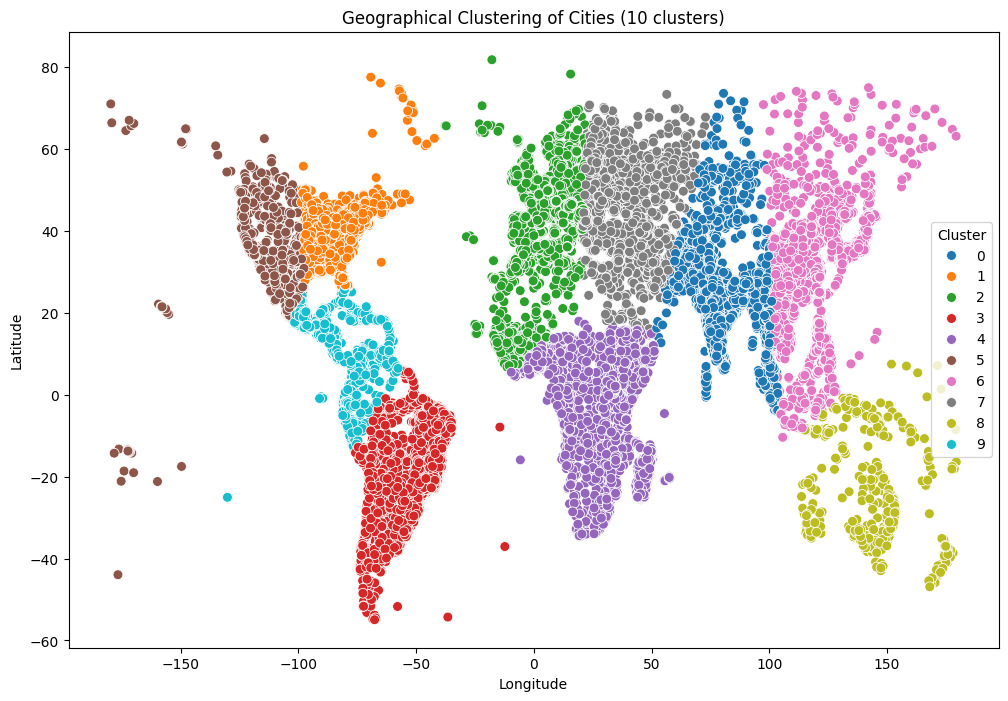

In [28]:
# 25. Geographical Clustering of Cities (Clustering by lat/long)
from sklearn.cluster import KMeans

coords = data[['lat', 'lng']]
kmeans = KMeans(n_clusters=10, random_state=42).fit(coords)
data['geo_cluster'] = kmeans.labels_

# Visualization: Clusters on Lat-Long scatter
plt.figure(figsize=(12,8))
sns.scatterplot(x='lng', y='lat', hue='geo_cluster', palette='tab10', data=data, legend='full', s=50)
plt.title('Geographical Clustering of Cities (10 clusters)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


In [29]:
# 26. Population by Geographical Cluster (Analysis: Population summary by cluster)
pop_cluster_summary  = data.groupby('geo_cluster')['population'].describe().sort_values(by='mean', ascending=False)
print("Population by Geographical Cluster Summary:\n", pop_cluster_summary)

Population by Geographical Cluster Summary:
                count           mean           std   min       25%      50%  \
geo_cluster                                                                  
6             5529.0  348163.481823  1.427775e+06   0.0  21913.00  44224.0   
4             3152.0  121603.173858  5.789760e+05  10.0  13000.00  23000.0   
7             4577.0  109866.542277  5.885103e+05  10.0  12619.00  24709.0   
5             1736.0   98578.531106  4.279819e+05  10.0  13192.75  24142.0   
0             9085.0   90262.247991  7.118023e+05  10.0  11081.00  17400.0   
9             3175.0   81171.030236  4.904773e+05  10.0  14096.00  26125.0   
8              465.0   74931.752688  3.762021e+05   4.0   4956.00  12100.0   
3             4006.0   69990.566151  5.299753e+05   0.0  13035.50  21460.0   
1             4456.0   66518.570018  4.224019e+05  10.0  11833.25  18108.0   
2            11627.0   41691.428571  2.066192e+05  10.0  11258.00  16786.0   

                  

In [30]:

# 27. Capitals per Geo Cluster (Analysis: Capitals by cluster)
capital_cpunts_cluster = data.groupby(['geo_cluster','capital']).size().unstack(fill_value=0)
print("Capital Counts per Geographical Cluster:\n", capital_cpunts_cluster)

Capital Counts per Geographical Cluster:
 capital      admin  minor  primary
geo_cluster                       
0              295    572       19
1               46      0        5
2              974   2072       55
3              122   3185       11
4              608    137       48
5               50    263        7
6              404    914       18
7              785   2142       32
8               82     35       14
9              273   1928       42


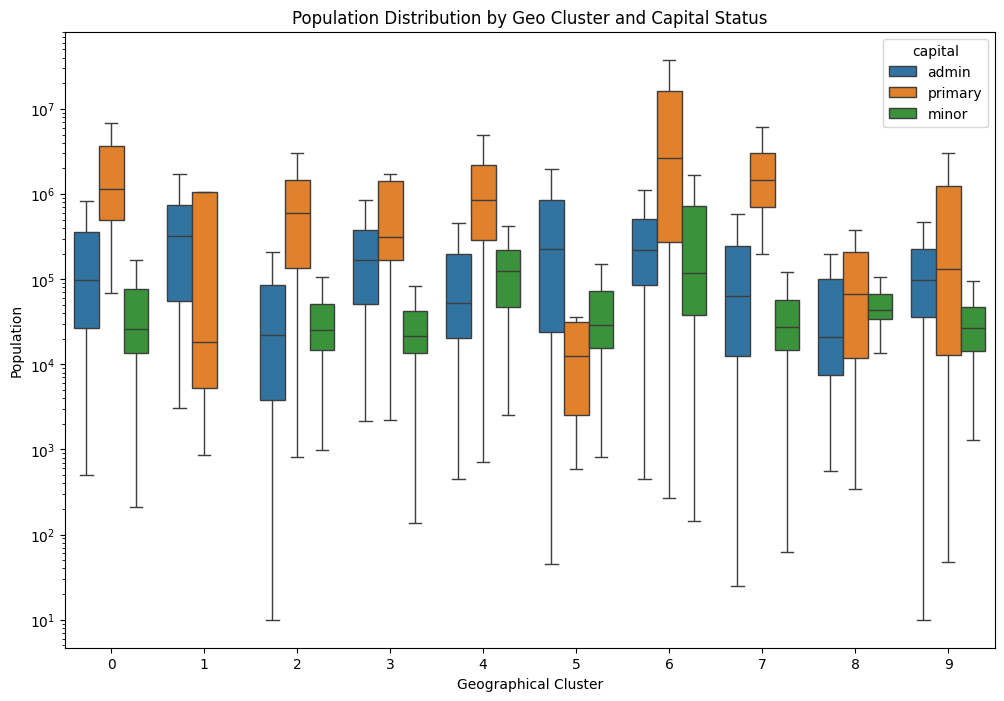

In [31]:
# 28. Population vs Capital Flag Boxplot by Cluster (Visualization)
plt.figure(figsize=(12,8))
sns.boxplot(x='geo_cluster', y='population', hue='capital', data=data, showfliers=False)
plt.yscale('log')
plt.title('Population Distribution by Geo Cluster and Capital Status')
plt.xlabel('Geographical Cluster')
plt.ylabel('Population')
plt.show()



In [32]:
# 29. Country with Most Mega Cities (Analysis: Mega Cities by Country)
mega_cities = data[data['population'] > 10000000]
mega_city_counts = mega_cities['country'].value_counts().head(10)
print("Top 10 Countries with Most Mega Cities:\n", mega_city_counts)

Top 10 Countries with Most Mega Cities:
 country
China            12
India             6
Japan             2
Brazil            2
Pakistan          2
United States     2
Indonesia         1
Korea, South      1
Philippines       1
Egypt             1
Name: count, dtype: int64


In [33]:
# 30. Capitals Population vs Non-Capitals Population (Analysis: Mean population comparison)
mean_pop_capital = data[data['capital']=='primary']['population'].mean()
mean_pop_noncapital = data[data['capital']!='primary']['population'].mean()
print(f"\nMean Population - Capitals: {mean_pop_capital:.0f}, Non-Capitals: {mean_pop_noncapital:.0f}")



Mean Population - Capitals: 2468203, Non-Capitals: 95549


Smart City Potential Project - Conclusion Report

1. Population Statistics:
   - Minimum population: 0
   - Maximum population: 37785000
   - Mean population: 107856
   - Median population: 20913



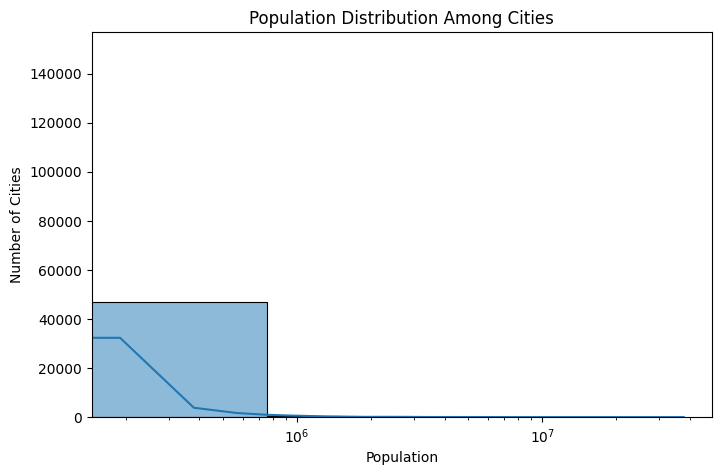

2. Capital City Insights:
   - Total capital (primary) cities: 251
   - Average capital city population: 2468202
   - Average non-capital city population: 95548



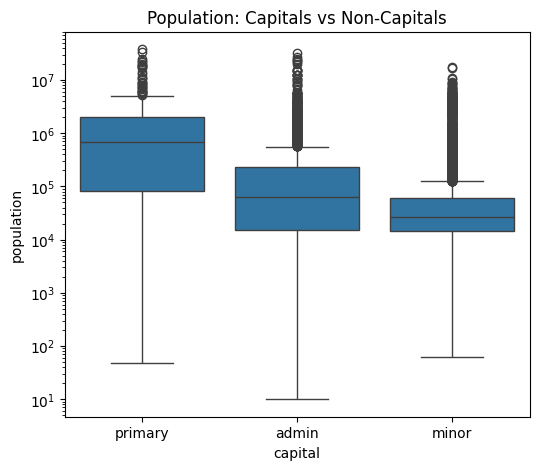

3. Population Group Distribution:
   - 41689 cities classified as <100K
   - 5372 cities classified as 100K-1M
   - 615 cities classified as 1M-5M
   - 86 cities classified as 5M-10M
   - 43 cities classified as >10M



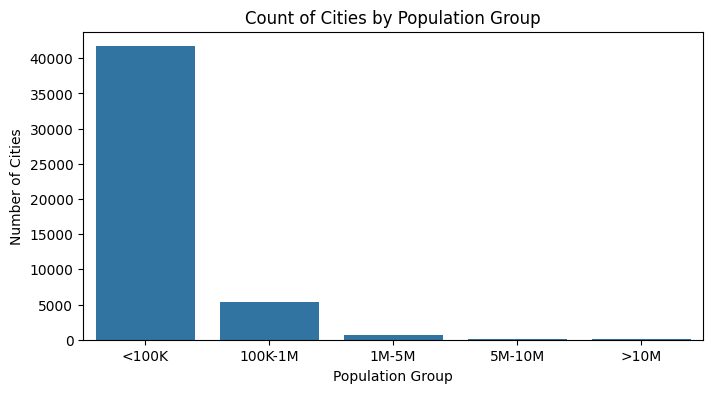

4. Top 5 Cities Ranked for Smart City Potential:
   1. Adamstown
   2. Ngerulmud
   3. Basse-Terre
   4. Kingston
   5. Brades

5. Geographic Clustering:
   - Identified 10 geographical clusters based on city locations.



C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


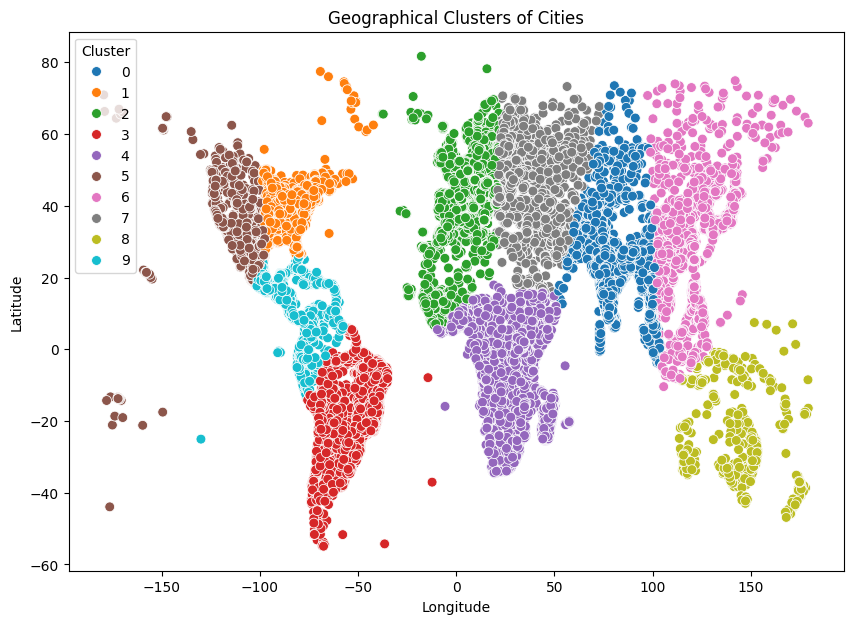

6. Final Remarks:
   - Population size and capital status are key indicators for prioritizing smart city potential.
   - Geographic clustering reveals spatial concentrations which can guide regional planning.
   - For comprehensive smart city evaluation, inclusion of infrastructure, governance, and environmental data is recommended.

Thank you for reviewing this Smart City Potential analysis report.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_project_conclusion_report(data):
    print("Smart City Potential Project - Conclusion Report\n")
    
    # 1. Population summary
    pop_summary = data['population'].describe()
    print("1. Population Statistics:")
    print(f"   - Minimum population: {int(pop_summary['min'])}")
    print(f"   - Maximum population: {int(pop_summary['max'])}")
    print(f"   - Mean population: {int(pop_summary['mean'])}")
    print(f"   - Median population: {int(pop_summary['50%'])}")
    print()
    # Visual: Population distribution histogram
    plt.figure(figsize=(8,5))
    sns.histplot(data['population'], bins=50, kde=True)
    plt.title('Population Distribution Among Cities')
    plt.xlabel('Population')
    plt.ylabel('Number of Cities')
    plt.xscale('log')
    plt.show()
    
    # 2. Capital city statistics
    capital_counts = data['capital'].value_counts()
    print("2. Capital City Insights:")
    print(f"   - Total capital (primary) cities: {capital_counts.get('primary', 0)}")
    mean_pop_capital = data[data['capital']=='primary']['population'].mean()
    mean_pop_noncapital = data[data['capital']!='primary']['population'].mean()
    print(f"   - Average capital city population: {int(mean_pop_capital)}")
    print(f"   - Average non-capital city population: {int(mean_pop_noncapital)}")
    print()
    # Visual: Population distribution boxplot capitals vs non-capitals
    plt.figure(figsize=(6,5))
    sns.boxplot(x='capital', y='population', data=data)
    plt.title('Population: Capitals vs Non-Capitals')
    plt.yscale('log')
    plt.show()

    # 3. Population group distribution
    pop_group_counts = data['population_group'].value_counts()
    print("3. Population Group Distribution:")
    for group, count in pop_group_counts.items():
        print(f"   - {count} cities classified as {group}")
    print()
    # Visual: Population group counts barplot
    plt.figure(figsize=(8,4))
    sns.countplot(x='population_group', data=data, order=pop_group_counts.index)
    plt.title('Count of Cities by Population Group')
    plt.xlabel('Population Group')
    plt.ylabel('Number of Cities')
    plt.show()

    # 4. Top cities by Smart City Potential score
    top_cities = data.sort_values(by='smart_city_score', ascending=False).head(5)
    print("4. Top 5 Cities Ranked for Smart City Potential:")
    for i, city in enumerate(top_cities['city'], 1):
        print(f"   {i}. {city}")
    print()

    # 5. Geographic clustering summary
    num_clusters = data['geo_cluster'].nunique()
    print("5. Geographic Clustering:")
    print(f"   - Identified {num_clusters} geographical clusters based on city locations.")
    print()
    # Visual: Geo clusters scatter plot
    plt.figure(figsize=(10,7))
    sns.scatterplot(x='lng', y='lat', hue='geo_cluster', palette='tab10', data=data, s=50)
    plt.title('Geographical Clusters of Cities')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.show()

    # 6. Final remarks
    print("6. Final Remarks:")
    print("   - Population size and capital status are key indicators for prioritizing smart city potential.")
    print("   - Geographic clustering reveals spatial concentrations which can guide regional planning.")
    print("   - For comprehensive smart city evaluation, inclusion of infrastructure, governance, and environmental data is recommended.")
    print("\nThank you for reviewing this Smart City Potential analysis report.")


# Run conclusion report generation with your data variable
generate_project_conclusion_report(data)


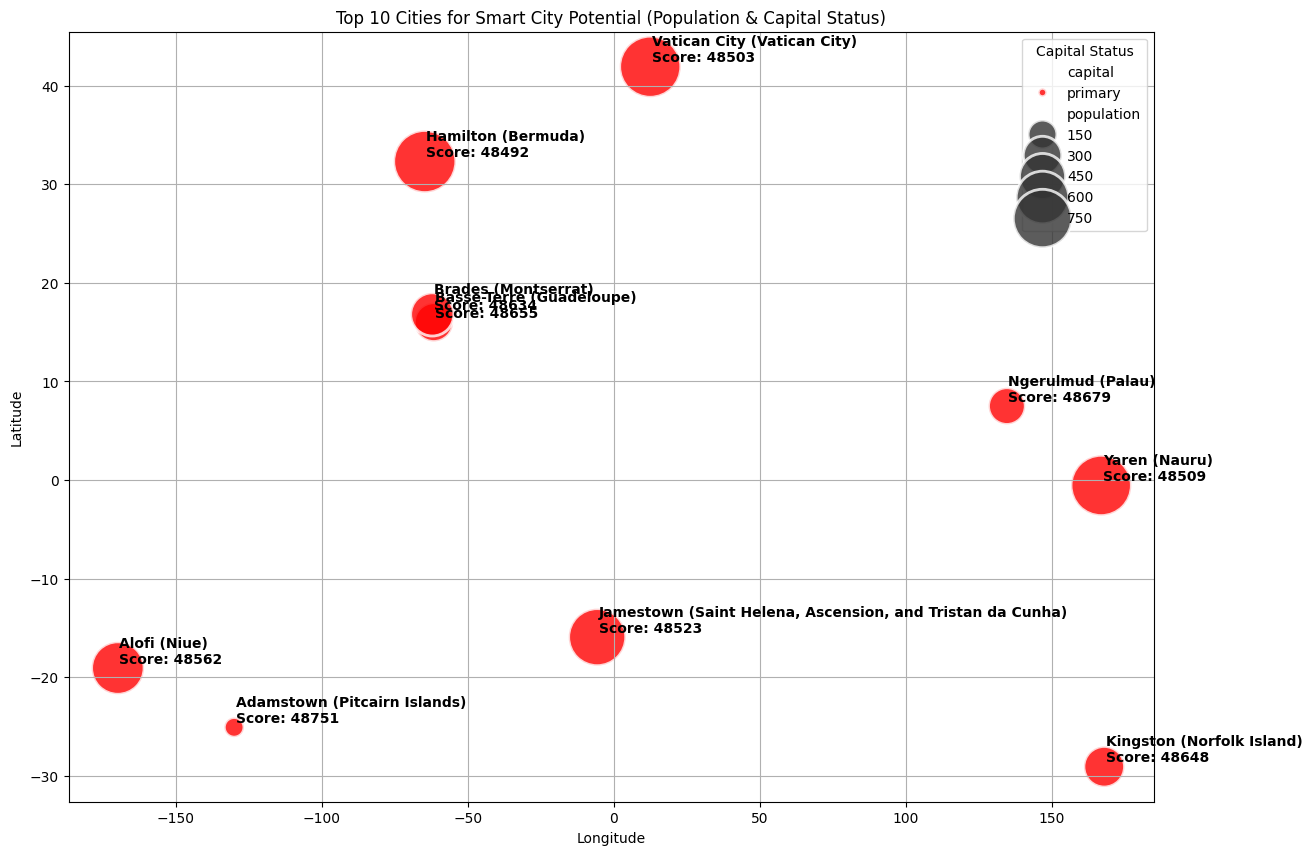

C:\Users\HP\AppData\Local\Temp\ipykernel_18540\1121867724.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


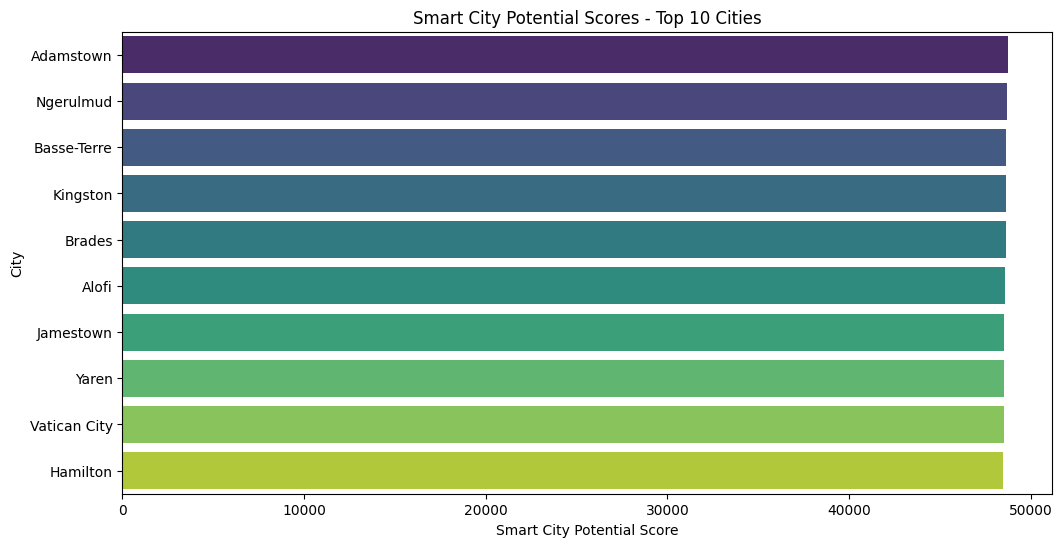

Top 10 Cities Driving Smart City Future (by Smart City Potential Score):
47751. Adamstown, Pitcairn Islands - Score: 48751
47680. Ngerulmud, Palau - Score: 48679
47655. Basse-Terre, Guadeloupe - Score: 48655
47648. Kingston, Norfolk Island - Score: 48648
47634. Brades, Montserrat - Score: 48634
47562. Alofi, Niue - Score: 48562
47523. Jamestown, Saint Helena, Ascension, and Tristan da Cunha - Score: 48523
47509. Yaren, Nauru - Score: 48509
47503. Vatican City, Vatican City - Score: 48503
47492. Hamilton, Bermuda - Score: 48492


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' dataframe has 'city', 'country', 'population', 'capital', 'smart_city_score', 'lat', 'lng'

# Select top 10 cities by Smart City Potential score
top_cities = data.sort_values(by='smart_city_score', ascending=False).head(10)

# Plot top cities on geographic map sized by population and colored by capital status
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x='lng', y='lat',
    size='population',
    hue='capital',
    palette={'primary': 'red', 'minor': 'blue', 'admin': 'green', '': 'gray'},
    sizes=(200, 2000),
    data=top_cities,
    legend='brief',
    alpha=0.8
)
plt.title('Top 10 Cities for Smart City Potential (Population & Capital Status)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Annotate city names and country with ranking
for i, row in top_cities.iterrows():
    plt.text(row['lng']+0.5, row['lat']+0.5,
             f"{row['city']} ({row['country']})\nScore: {int(row['smart_city_score'])}",
             horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.legend(title='Capital Status')
plt.grid(True)
plt.show()

# Bar plot showing smart city score ranking
plt.figure(figsize=(12,6))
sns.barplot(
    x='smart_city_score', y='city',
    data=top_cities,
    palette='viridis'
)
plt.title('Smart City Potential Scores - Top 10 Cities')
plt.xlabel('Smart City Potential Score')
plt.ylabel('City')
plt.show()

# Print the top 10 city list clearly
print("Top 10 Cities Driving Smart City Future (by Smart City Potential Score):")
for i, row in top_cities.iterrows():
    print(f"{i+1}. {row['city']}, {row['country']} - Score: {int(row['smart_city_score'])}")



In [36]:
import pandas as pd
import numpy as np

# Assuming df is your original dataframe used for analysis

# Add the analysis columns as per your project
data['capital_flag'] = data['capital'].apply(lambda x: 1 if x == 'primary' else 0)

# Smart City Potential Score (example based on population rank + capital flag)
data['smart_city_score'] = data['population'].rank(ascending=False) + data['capital_flag'] * 1000

# Population group categorization
bins = [0, 100000, 1000000, 5000000, 10000000, np.inf]
labels = ['Small', 'Medium', 'Large', 'Very Large', 'Mega City']
data['population_group'] = pd.cut(data['population'], bins=bins, labels=labels)

# If you did clustering before, include that column or skip if not available
# data['geo_cluster'] = your clustering result if available

# Select columns to save in CSV
cols_to_save = [
    'city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
    'admin_name', 'capital', 'population', 'smart_city_score', 'population_group'
]

# Save to CSV file
output_file = 'smart_city_analysis_data.csv'
data.to_csv(output_file, columns=cols_to_save, index=False)

print(f"Analysis data saved to {output_file}")


Analysis data saved to smart_city_analysis_data.csv
